In [ ]:
import os,shutil

In [ ]:
os.environ['KAGGLE_USERNAME']='rohanazad'
os.environ['KAGGLE_KEY']='f3cf3c594532e397b78564e4bbe88ec6'

In [ ]:
!kaggle competitions download -c ashrae-energy-prediction

building_metadata.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
weather_test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
weather_train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import pandas as pd

In [ ]:
import zipfile

unzipped_train=zipfile.ZipFile('train.csv.zip')
unzipped_train.extractall()
unzipped_train.close()

unzipped_test=zipfile.ZipFile('test.csv.zip')
unzipped_test.extractall()
unzipped_test.close()

In [ ]:
# unzipped_weather_train=zipfile.ZipFile('weather_train.csv.zip')
# unzipped_weather_train.extractall()
# unzipped_weather_train.close()

# unzipped_weather_test=zipfile.ZipFile('weather_test.csv.zip')
# unzipped_weather_test.extractall()
# unzipped_weather_test.close()

In [ ]:
# weather_train=pd.read_csv('weather_train.csv')
# weather_test=pd.read_csv('weather_test.csv')
# building_met=pd.read_csv('building_metadata.csv')

In [ ]:
# total=weather_train.isnull().sum().sort_values(ascending=False)
# percent=(weather_train.isnull().sum()/weather_train.isnull().count()).sort_values(ascending=False)
# missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
# missing_values.head(20)

In [ ]:
# total=building_met.isnull().sum().sort_values(ascending=False)
# percent=(building_met.isnull().sum()/building_met.isnull().count()).sort_values(ascending=False)
# missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
# missing_values.head(20)

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
weather_train_dir='/content/drive/My Drive/weather_train3.csv'
weather_train=pd.read_csv(weather_train_dir)
weather_test_dir='/content/drive/My Drive/weather_test2.csv'
weather_test=pd.read_csv(weather_test_dir)
building_met_dir='/content/drive/My Drive/building_metadata_save.csv'
building_met=pd.read_csv(building_met_dir)

In [ ]:
# total=train.isnull().sum().sort_values(ascending=False)
# percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
# missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
# missing_values.head(20)

In [ ]:
# train.head()

In [ ]:
print('shape of train:',train.shape)
print('shape of test:',test.shape)
print('shape of weather_train:',weather_train.shape)
print('shape of weather_test:',weather_test.shape)
print('shape of building_metadata:',building_met.shape)

shape of train: (20216100, 4)
shape of test: (41697600, 4)
shape of weather_train: (139788, 12)
shape of weather_test: (277243, 12)
shape of building_metadata: (1449, 6)


In [ ]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

**timestamp stores data as strings in a particular format. Year,month,day,time**

**Apply to_datetime to convert string to object**

In [ ]:
train['timestamp']=pd.to_datetime(train['timestamp'])
test['timestamp']=pd.to_datetime(test['timestamp'])
weather_train['timestamp']=pd.to_datetime(weather_train['timestamp'])
weather_test['timestamp']=pd.to_datetime(weather_test['timestamp'])

building_met['primary_use']=building_met['primary_use'].astype('category')

**Merging the three dataset to create train set**

In [ ]:
temp=train[['building_id']]
temp=temp.merge(building_met,on='building_id',how='left')
del temp['building_id']
train=pd.concat([train,temp],axis=1)



In [ ]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,4
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,4
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,4
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,4
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,4


In [ ]:
temp=train[['site_id','timestamp']]
temp=temp.merge(weather_train,on=['site_id','timestamp'],how='left')
del temp['site_id'],temp['timestamp']
train=pd.concat([train,temp],axis=1)

del temp,weather_train

In [ ]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,Month,Day_date,year
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0


In [ ]:
train.shape

(20216100, 19)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   building_id         int64         
 1   meter               int64         
 2   timestamp           datetime64[ns]
 3   meter_reading       float64       
 4   site_id             int64         
 5   primary_use         category      
 6   square_feet         int64         
 7   year_built          float64       
 8   floor_count         int64         
 9   air_temperature     float64       
 10  cloud_coverage      float64       
 11  dew_temperature     float64       
 12  precip_depth_1_hr   float64       
 13  sea_level_pressure  float64       
 14  wind_direction      float64       
 15  wind_speed          float64       
 16  Month               float64       
 17  Day_date            float64       
 18  year                float64       
dtypes: category(1), datetime64[ns](1), float

**Creating Hour column**

In [ ]:
import numpy as np

train['hour_datetime']=train['timestamp'].dt.hour.astype(np.int8)

del train['timestamp']

In [ ]:
train.head()

,building_id,meter,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,Month,Day_date,year,hour_datetime
0,0,0,0.0,0,Education,7432,2008.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0,0
1,1,0,0.0,0,Education,2720,2004.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0,0
2,2,0,0.0,0,Education,5376,1991.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0,0
3,3,0,0.0,0,Education,23685,2002.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0,0
4,4,0,0.0,0,Education,116607,1975.0,4,25.0,6.0,6.0,1.382557,1019.7,0.0,0.0,1.0,1.0,2016.0,0


**Looking for missing values**

In [ ]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_values.head(20)

,total,percent
cloud_coverage,82890,0.0041
Day_date,82890,0.0041
Month,82890,0.0041
wind_speed,82890,0.0041
wind_direction,82890,0.0041
sea_level_pressure,82890,0.0041
precip_depth_1_hr,82890,0.0041
dew_temperature,82890,0.0041
year,82890,0.0041
air_temperature,82890,0.0041


In [ ]:
train=train.dropna()

In [ ]:
train.describe()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,Month,Day_date,year,hour_datetime
count,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,2.013321e+07,20133210.0,2.013321e+07
mean,7.974179e+02,6.617699e-01,2.124405e+03,7.970224e+00,1.077780e+05,1.969521e+03,4.030442e+00,1.593926e+01,1.787219e+00,1.787219e+00,1.144656e+00,9.767713e+02,1.708236e+02,3.377249e+00,6.566733e+00,1.578433e+01,2016.0,1.150934e+01
std,4.264339e+02,9.310602e-01,1.535506e+05,5.092977e+00,1.171483e+05,2.014374e+01,1.665084e+00,1.098146e+01,2.003313e+00,2.003313e+00,6.979683e+00,1.961202e+02,1.107229e+02,2.261500e+00,3.441398e+00,8.802123e+00,0.0,6.923804e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.830000e+02,1.900000e+03,1.000000e+00,-2.890000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2016.0,0.000000e+00
25%,3.910000e+02,0.000000e+00,1.830000e+01,3.000000e+00,3.252700e+04,1.964000e+03,4.000000e+00,8.300000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.011100e+03,8.000000e+01,2.100000e+00,4.000000e+00,8.000000e+00,2016.0,6.000000e+00
50%,8.940000e+02,0.000000e+00,7.875000e+01,9.000000e+00,7.270900e+04,1.975000e+03,4.000000e+00,1.670000e+01,1.109988e+00,1.109988e+00,0.000000e+00,1.015895e+03,1.700000e+02,3.100000e+00,7.000000e+00,1.600000e+01,2016.0,1.200000e+01
75%,1.176000e+03,1.000000e+00,2.679400e+02,1.300000e+01,1.391130e+05,1.975054e+03,4.000000e+00,2.390000e+01,2.873133e+00,2.873133e+00,0.000000e+00,1.020200e+03,2.700000e+02,4.600000e+00,1.000000e+01,2.300000e+01,2016.0,1.800000e+01
max,1.448000e+03,3.000000e+00,2.190470e+07,1.500000e+01,8.750000e+05,2.017000e+03,2.600000e+01,4.720000e+01,9.000000e+00,9.000000e+00,3.430000e+02,1.045500e+03,3.600000e+02,1.900000e+01,1.200000e+01,3.100000e+01,2016.0,2.300000e+01


In [ ]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_values.head(20)

,total,percent
hour_datetime,0,0.0
air_temperature,0,0.0
meter,0,0.0
meter_reading,0,0.0
site_id,0,0.0
primary_use,0,0.0
square_feet,0,0.0
year_built,0,0.0
floor_count,0,0.0
cloud_coverage,0,0.0


**Before applying pipeline transformation, electricity dataset has been separated**

In [ ]:
dataset_electricity=train.loc[(train['meter']==0)]

In [ ]:
dataset_electricity.shape

(12021413, 19)

In [ ]:
drop_cols=['meter_reading']

In [ ]:
training_electricity=dataset_electricity.drop(drop_cols,axis=1)

In [ ]:
target_electricity=dataset_electricity['meter_reading']

In [ ]:
training_electricity.shape

(12021413, 18)

In [ ]:
target_electricity.shape

(12021413,)

**Apply pipeline transformation to training_chilled_water**

In [ ]:
num_cols=['square_feet','floor_count','air_temperature',
                 'cloud_coverage','dew_temperature','precip_depth_1_hr',
                 'sea_level_pressure','wind_direction','wind_speed']
cat_cols=['primary_use']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs=list(num_cols)
cat_attribs=['primary_use']

num_pipeline=Pipeline([
    ('std_scaler',StandardScaler())
])

full_pipeline=ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])

training_prepared=full_pipeline.fit_transform(training_electricity)
#('num',num_pipeline,num_attribs),

12021413 *0.2 = 2,404,283///// 12021413 - 2,404,283 = 9617130

In [ ]:
x_train=training_prepared[:9617130]
x_val=training_prepared[9617130:]
y_train=target_electricity[:9617130]
y_val=target_electricity[9617130:]

In [ ]:
print('shape of x_train:',x_train.shape)
print('shape of x_val:',x_val.shape)
print('shape of y_train:',y_train.shape)
print('shape of y_val:',y_val.shape)

shape of x_train: (9617130, 25)
shape of x_val: (2404283, 25)
shape of y_train: (9617130,)
shape of y_val: (2404283,)


**Working with test set**

In [ ]:
test.head()

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01
1,1,1,0,2017-01-01
2,2,2,0,2017-01-01
3,3,3,0,2017-01-01
4,4,4,0,2017-01-01


In [ ]:
test.shape

(41697600, 4)

In [ ]:
import pandas as pd

temp=test[['building_id']]
temp=temp.merge(building_met,on='building_id',how='left')
del temp['building_id']
test=pd.concat([test,temp],axis=1)

In [ ]:
test.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,0,2017-01-01,0,Education,7432,2008.0,4
1,1,1,0,2017-01-01,0,Education,2720,2004.0,4
2,2,2,0,2017-01-01,0,Education,5376,1991.0,4
3,3,3,0,2017-01-01,0,Education,23685,2002.0,4
4,4,4,0,2017-01-01,0,Education,116607,1975.0,4


In [ ]:
temp=test[['site_id','timestamp']]
temp=temp.merge(weather_test,on=['site_id','timestamp'],how='left')
del temp['timestamp'],temp['site_id']
test=pd.concat([test,temp],axis=1)

del temp,weather_test

In [ ]:
test.head()

In [ ]:
import numpy as np

test['hour_datetime']=test['timestamp'].dt.hour.astype(np.int8)

del test['timestamp']

In [ ]:
total=test.isnull().sum().sort_values(ascending=False)
percent=(test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_values.head(20)

In [ ]:
test=test.dropna()

In [ ]:
test.describe()

In [ ]:
test_electricity= test.loc[(test['meter']==0)]

In [ ]:
test_electricity.shape

In [ ]:
test_drop_cols=['row_id']

In [ ]:
testing=test_electricity.drop(test_drop_cols,axis=1)

In [ ]:
testing.shape

In [ ]:
num_cols=['square_feet','floor_count','air_temperature',
                 'cloud_coverage','dew_temperature','precip_depth_1_hr',
                 'sea_level_pressure','wind_direction','wind_speed']
cat_cols=['primary_use']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs=list(num_cols)
cat_attribs=['primary_use']

num_pipeline=Pipeline([
    ('std_scaler',StandardScaler())
])

full_pipeline=ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])

testing_prepared=full_pipeline.fit_transform(testing)
#('num',num_pipeline,num_attribs),

**Learning curve, regularization, learning rate, degree power**

**Learning rate**

In [ ]:
# m = x_train[:10000].shape[0]
# n = x_train[:10000].shape[1]

In [ ]:
# y_train = np.expand_dims(y_train, 1)

In [ ]:
# y_train.shape

(3329233, 1)

In [ ]:
# def ComputeCostMulti(x_train,y_train,theta):
#   h=x_train .dot (theta)
#   error= h-y_train
#   J = (1./(2*m)) * ((error.T) .dot (error))

In [ ]:
# def GradientDescentMulti(x_train,y_train, theta, eta, num_iters):
#   J_history=[]
#   for iter in range (1,201):
#     h= x_train.dot(theta)
#     error=h-y_train
#     theta_change = (2./m) * eta * (x_train.T .dot(error))
#     theta=theta-theta_change
#     cost_history=(1./(2*m)) * ((error.T) .dot (error))
#     J_history.append(cost_history)
#   return J_history


**learning rate =0.01**

In [ ]:
# theta = np.zeros((n,1))
# num_iters=200
# eta = 0.01
# history = GradientDescentMulti(x_train[:10000],y_train[:10000], theta, eta, num_iters)
# print(history)

[array([[81356.12586108]]), array([[80471.50112982]]), array([[79666.32939595]]), array([[78932.68166858]]), array([[78263.44937697]]), array([[77652.25813153]]), array([[77093.39062281]]), array([[76581.71768597]]), array([[76112.63666171]]), array([[75682.01627768]]), array([[75286.1473568]]), array([[74921.69873333]]), array([[74585.67782323]]), array([[74275.39535453]]), array([[73988.433816]]), array([[73722.61922962]]), array([[73475.99589418]]), array([[73246.80378522]]), array([[73033.45832952]]), array([[72834.53230297]]), array([[72648.73962681]]), array([[72474.92086158]]), array([[72312.03021913]]), array([[72159.12393242]]), array([[72015.34983968]]), array([[71879.93805475]]), array([[71752.19260912]]), array([[71631.48396327]]), array([[71517.24229579]]), array([[71408.95148838]]), array([[71306.14373378]]), array([[71208.39470091]]), array([[71115.31919906]]), array([[71026.56728867]]), array([[70941.82079188]]), array([[70860.79016118]]), array([[70783.21166867]]), arr

In [ ]:
# history = np. array(history)
# history_reshape=np.reshape(history, (200,))

**Learning rate =0.003**

In [ ]:
# theta = np.zeros((n,1))
# num_iters=200
# eta = 0.003
# history_003 = GradientDescentMulti(x_train[:10000],y_train[:10000], theta, eta, num_iters)
# #print(history)

In [ ]:
# history_003 = np. array(history_003)
# history_003reshape=np.reshape(history_003, (200,))

**Learning rate =0.001**

In [ ]:
# theta = np.zeros((n,1))
# num_iters=200
# eta = 0.001
# history_001 = GradientDescentMulti(x_train[:10000],y_train[:10000], theta, eta, num_iters)
# #print(history)

In [ ]:
# history_001 = np. array(history_001)
# history_001reshape=np.reshape(history_001, (200,))

**Learning rate =0.03**

In [ ]:
# theta = np.zeros((n,1))
# num_iters=200
# eta = 0.03 
# history_03 = GradientDescentMulti(x_train[:10000],y_train[:10000], theta, eta, num_iters)
# #print(history)

In [ ]:
# history_03 = np. array(history_03)
# history_03reshape=np.reshape(history_03, (200,))

**Learning rate = 0.3**

In [ ]:
# theta = np.zeros((n,1))
# num_iters=200
# eta = 0.3
# history_3 = GradientDescentMulti(x_train[:10000],y_train[:10000], theta, eta, num_iters)
# #print(history)

In [ ]:
# history_3 = np. array(history_3)
# history_3reshape=np.reshape(history_3, (200,))

**Learning rate =0.1**

In [ ]:
# theta = np.zeros((n,1))
# num_iters=200
# eta = 0.1
# history_1 = GradientDescentMulti(x_train[:10000],y_train[:10000], theta, eta, num_iters)
# #print(history)

In [ ]:
# history_1 = np. array(history_1)
# history_1reshape=np.reshape(history_1, (200,))

In [ ]:
# import matplotlib.pyplot as plt

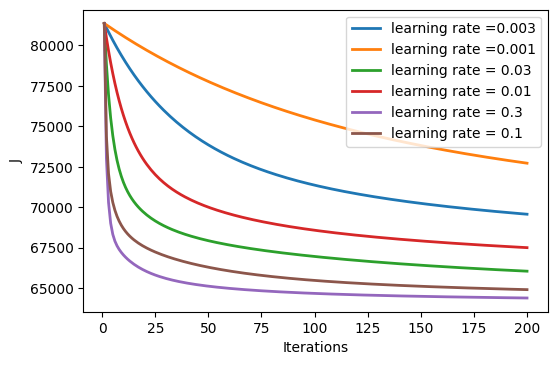

In [ ]:
# fig,axes=plt.subplots(1,1,figsize=(6,4),dpi=100)
# plt.plot(range(1,201),history_003reshape,linewidth=2,label='learning rate =0.003')
# plt.plot(range(1,201),history_001reshape,linewidth=2,label='learning rate =0.001')
# plt.plot(range(1,201),history_03reshape,linewidth=2, label = 'learning rate = 0.03')
# plt.plot(range(1,201),history_reshape,linewidth=2, label = 'learning rate = 0.01')
# plt.plot(range(1,201),history_3reshape,linewidth=2, label = 'learning rate = 0.3')
# plt.plot(range(1,201),history_1reshape,linewidth=2, label = 'learning rate = 0.1')
# plt.xlabel('Iterations')
# plt.ylabel('J')
# plt.legend()


**Learning curve**

In [ ]:
# x_val.shape

In [ ]:
# def ComputeCostMulti(x_train,y_train,theta):
#   h=x_train .dot (theta)
#   error= h-y_train
#   J = (1./(2*m)) * ((error.T) .dot (error))

In [ ]:
# def GradientLearningCurve(x_train,y_train, initial_theta, eta, num_iters):
#   theta=[]
#   for i in range (1,201):
#     h= x_train.dot(initial_theta)
#     error=h-y_train
#     theta_change = (1./m) * eta * (x_train.T .dot(error))
#     theta_grad=theta-theta_change
#     theta.append(theta_grad)
#   return theta

In [ ]:
# def LearningCurveError(X,y,theta):
#   h=X.dot (theta)
#   error= h-y
#   J = (1./(2*m)) * ((error.T) .dot (error))


In [ ]:
# def LearningCurveTrain(X,y,eta,initial_theta,num_iters):
#   train_error=[]
#   for i in range(1,m):
#     theta = GradientLearningCurve(x_train[:i],y_train[:i],initial_theta,eta,num_iters)
#     training_error = LearningCurveError(x_train[:i],y_train[:i],theta)
#     #val_error = LearningCurveError(x_val,y_val,theta)
#     train_error.append(training_error)
#     #val_error.append(val_error)

#   return train_error
#   #return val_error

In [ ]:
# eta = 0.3
# initial_theta=np.zeros((n,1))
# num_iters=200
# train_errors=LearningCurveTrain(x_train,y_train,eta, initial_theta,num_iters)

In [ ]:
# print(train_errors)

In [ ]:
# def LearningCurveTrain(X_train,y_train,x_val,y_val,eta,initial_theta,num_iters):
#   val_error=[]
#   for i in range(1,m):
#     theta = GradientLearningCurve(x_train[:i],y_train[:i],initial_theta,eta,num_iters)
#     #training_error = LearningCurveError(x_train[:i],y_train[:i],theta)
#     validation_error = LearningCurveError(x_val,y_val,theta)
#     train_error.append(training_error)
#     #val_error.append(val_error)
#   return train_error
#   #return val_error

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

lin_reg=LinearRegression()
lin_reg.fit(x_train[:1000000],y_train[:1000000])
lin_predict=lin_reg.predict(x_val)
lin_mse=mean_squared_error(lin_predict,y_val)
lin_rmse=sqrt(lin_mse)
lin_rmse

330.71624963031195

Linear regression RMSE 330.71624963031195

**Applying 2 degree polynomial**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly_features.fit_transform(x_train[:1000000])
lin_reg=LinearRegression()
lin_reg.fit(x_poly,y_train[:1000000])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_val_poly=poly_features.transform(x_val)
predict=lin_reg.predict(x_val_poly)
degree2_mse=mean_squared_error(predict,y_val)
degree2_rmse=sqrt(degree2_mse)
degree2_rmse

2486.5616840162443

2nd degree polynomial RMSE 2486.5616840162443

**Applying 3 degree polynomial. 3 or higher degree polynomial will have to be done through virtual server**

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures

# poly3_features=PolynomialFeatures(degree=3,include_bias=False)
# x_poly=poly3_features.fit_transform(x_train[:1000000])
# lin_reg=LinearRegression()
# lin_reg.fit(x_poly,y_train[:1000000])

In [ ]:
# x_val_poly=poly3_features.transform(x_val)
# predict=lin_reg.predict(x_val_poly)
# degree3_mse=mean_squared_error(predict,y_val)
# degree3rmse=sqrt(degree2_mse)
# degree3_rmse

**Using grid search with Ridge regression**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
param_grid=[
            {'alpha':[0.001,0.003,0.01,0.03,0.1,0.3,1,3]}
]

ridge_reg=Ridge()

grid_search=GridSearchCV(ridge_reg,param_grid,cv=5,
                         scoring='neg_mean_squared_error',
                         return_train_score=True)

grid_search.fit(x_train[:1000000],y_train[:1000000])

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
grid_search.best_params_

{'alpha': 0.001}

Ridge regression alpha=0.001


**Ridge regression with alpha=0.001**

In [ ]:
from sklearn.metrics import mean_squared_error

ridge_reg=Ridge(alpha=0.001,solver='cholesky')
ridge_reg.fit(x_train[:1000000],y_train[:1000000])
ridge_pred=ridge_reg.predict(x_val)
ridge_mse=mean_squared_error(ridge_pred,y_val)
ridge_rmse=np.sqrt(ridge_mse)
ridge_rmse

330.7155506044864

Ridge regression RMSE 330.7155506044864

**Using grid search with Lasso regression**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

param_grid=[
            {'alpha':[0.001,0.003,0.01,0.03,0.1,0.3,1,3]}
]

lasso_reg=Lasso()

grid_search=GridSearchCV(lasso_reg,param_grid,cv=5,
                         scoring='neg_mean_squared_error',
                         return_train_score=True)

grid_search.fit(x_train[:1000000],y_train[:1000000])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4528941406.125755, tolerance: 9787060.935060643
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11310130249.811222, tolerance: 9553136.87984566
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4461370443.598045, tolerance: 9559210.098052628
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4368647885.0

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
grid_search.best_params_

{'alpha': 0.003}

Lasso regression alpha= 0.003

**Lasso regression with alpha= 0.003**

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg=Lasso(alpha=0.003)
lasso_reg.fit(x_train[:1000000],y_train[:1000000])
lasso_pred=lasso_reg.predict(x_val)
lasso_mse=mean_squared_error(lasso_pred,y_val)
lasso_rmse=np.sqrt(lasso_mse)
lasso_rmse

330.71471612045525

Lasso regression RMSE 330.71471612045525

**Grid search with elastic net**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

param_grid=[
            {'alpha':[0.001,0.003,0.01,0.03,0.1,0.3,1,3]}
]

elastic_reg=ElasticNet()

grid_search=GridSearchCV(elastic_reg,param_grid,cv=5,
                         scoring='neg_mean_squared_error',
                         return_train_score=True)

grid_search.fit(x_train[:1000000],y_train[:1000000])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16451011430.277193, tolerance: 9787060.935060643
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15083615218.466158, tolerance: 9553136.87984566
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15575542633.115849, tolerance: 9559210.098052628
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1448678462

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
grid_search.best_params_

{'alpha': 0.001}

Elastic net alpha=0.001

**Applying elastic net with alpha=0.001**

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_reg=ElasticNet(alpha=0.001)
elastic_reg.fit(x_train[:1000000],y_train[:1000000])
elastic_pred=elastic_reg.predict(x_val)
elastic_mse=mean_squared_error(elastic_pred,y_val)
elastic_rmse=np.sqrt(elastic_mse)
elastic_rmse

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19177981844.00997, tolerance: 11899148.79088665
  positive)


330.7190547383702

Elastic net RMSE= 330.7190547383702

**Batch gradient descent**

In [ ]:
#bias_column_size = x_train.shape[0] 
bias_column_size = 1000000   # when running the full simulation the first bias_column_size will be used But in colab, to accodomate for RAM, the second bias_column_size will be used.

In [ ]:
x_train_b = np.c_ [np.ones((bias_column_size,1)), x_train[:1000000]]# adding the bias column in x_train

**Using normal equation to get theta and then compare with BGD and SGD,MGD**

In [ ]:
theta_best = np.linalg.inv(x_train_b.T .dot (x_train_b)) .dot(x_train_b.T) .dot (y_train[:1000000])
theta_best

In [ ]:
bias_val_column_size = x_val.shape[0]

In [ ]:
x_val_b = np.c_[np.ones((bias_val_column_size,1)),x_val]

**Batch gradient descent**

In [ ]:
eta_BGD=0.3
n_iterations = 20
m= 1000000

theta_BGD = np.random.randn(theta_best.shape[0],1)
for iteration in range(n_iterations):
    gradients_BGD = 2/m * x_train_b.T.dot(x_train_b.dot(theta_BGD) - y_train[:1000000])
    theta_BGD = theta_BGD - eta_BGD * gradients_BGD 

In [ ]:
theta_BGD

**Grid search to get the optimal learning rate**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

param_grid=[
            {'eta0':[0.001,0.003,0.01,0.03,0.1,0.3,1,3]}
]

sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty='l2')

grid_search=GridSearchCV(sgd_reg,param_grid,cv=5,
                         scoring='neg_mean_squared_error',
                         return_train_score=True)
grid_search.fit(x_train[:1000000],y_train[:1000000])

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'eta0': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
grid_search.best_params_

{'eta0': 0.003}

**Stochastic gradient descent with eta0=0.003**

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn. metrics import mean_squared_error

sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty='l2',eta0=0.003)
sgd_reg.fit(x_train[:1000000],y_train[:1000000])
sgd_pred=sgd_reg.predict(x_val)
sgd_mse=mean_squared_error(sgd_pred,y_val)
sgd_rmse=np.sqrt(sgd_mse)
sgd_rmse

330.1397333576241

Stochastic gradient descent RMSE with eta0=0.003 is 330.1397333576241

**Support Vector Regressor**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

param_grid = [
              {'epsilon':[0.003,0.001,0.03,0.01,0.3,0.1,1,3,10,20,50,100,400,800,1000]}
]

svm_reg = LinearSVR()
grid_search = GridSearchCV(svm_reg,param_grid,
                           scoring ='neg_mean_squared_error',
                           return_train_score =True)
grid_search.fit(x_train[:1000000],y_train[:1000000])

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'epsilon': [0.003, 0.001, 0.03, 0.01, 0.3, 0.1, 1, 3,
                                      10, 20, 50, 100, 400, 800, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
grid_search.best_params_

{'epsilon': 100}

**from grid search epsilon = 100. LinearSVR with epsilon = 100**

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from math import sqrt

svm_reg = LinearSVR(epsilon =200)
svm_reg.fit(x_train[:1000000],y_train[:1000000])
svm_reg_pred = svm_reg.predict(x_val)
svm_reg_error = mean_squared_error(svm_reg_pred,y_val)
svm_reg_rmse = sqrt(svm_reg_error)
svm_reg_rmse

338.9393933085223

LinearSVR RMSE = 338.9393933085223

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
              {'epsilon':[10,20,50,100,400,800,1000]},
              {'degree':[2,3,4,5]},
              {'C':[0.003,0.001,0.03,0.01]} #,20,50,100,400,800,1000
]

svm_poly_reg = SVR(kernel = 'poly')

grid_search = GridSearchCV(svm_poly_reg,param_grid,
                           scoring ='neg_mean_squared_error',
                           return_train_score =True)

grid_search.fit(x_train[:1000000],y_train[:1000000])

In [ ]:
grid_search.bet_params_

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics mean_squared_error
from math import sqrt

svm_poly_reg = SVR(kernel ='poly', degree = '', C ='', epislon ='')
svm_poly_reg.fit(x_train[:1000000],y_train[:1000000])
svm_poly_pred = svm_poly_reg.pred(x_val)
svm_poly_mse=mean_squared_error(svm_poy_pred,y_val)
svm_poly_rmse = sqrt(svm_poly_mse)
svm_poy_rmse

**Decision tree**

**The plan was to let decision tree fit however it wanted and let it overfit, make the figure using export_graphviz and then reducing overfitting**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg=DecisionTreeRegressor()
tree_reg.fit(x_train[:1000000],y_train[:1000000])
tree_pred=tree_reg.predict(x_val)
tree_mse=mean_squared_error(tree_pred,y_val)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

345.14833921723493

Decision tree RMSE = 2478.8828020681417


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg=DecisionTreeRegressor(max_depth =20, max_leaf_nodes=200)
tree_reg.fit(x_train[:1000000],y_train[:1000000])
tree_pred=tree_reg.predict(x_val)
tree_mse=mean_squared_error(tree_pred,y_val)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

325.3661622505669

Decision tree RMSE = 2465.122

In [ ]:
# import os

# PROJECT_ROOT_DIR = "."
# CHAPTER_ID = "decision_trees"
# IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# os.makedirs(IMAGES_PATH, exist_ok=True)

In [ ]:
# from graphviz import Source
# from sklearn.tree import export_graphviz

# export_graphviz(
#         tree_reg,
#         out_file=os.path.join(IMAGES_PATH, "dec_tree.dot"),
#         feature_names=,
#         rounded=True,
#         filled=True
#     )

# Source.from_file(os.path.join(IMAGES_PATH, "dec_tree.dot"))

AttributeError: ignored

**Ensemble**

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

lin_reg=LinearRegression()
#ridge_reg=Ridge(alpha=0.001,solver='cholesky')
#lasso_reg=Lasso(alpha=0.003)
#elastic_reg=ElasticNet(alpha=0.001)
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty='l2',eta0=0.003)
#svm_reg = LinearSVR(epsilon =200)
tree_reg=DecisionTreeRegressor(max_depth =20, max_leaf_nodes=200)

voting_reg=VotingRegressor(
    estimators=[('lr',lin_reg),('sgd_reg',sgd_reg),
                ('tree',tree_reg)]
)

voting_reg.fit(x_train[:1000000],y_train[:1000000])

VotingRegressor(estimators=[('lr',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('sgd_reg',
                             SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.003, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, rand...
                                          validation_fraction=0.1, verbose=0,
                                          warm_start=False)),
                            ('tree',
                        

In [ ]:
# from sklearn.metrics import accuracy_score

# for reg in (lin_reg,ridge_reg,sgd_reg,svm_reg,tree_reg):
#   reg.fit(x_train[:1000000],y_train[:1000000])
#   pred = reg.predict(x_val)
#   print(reg.__class__.__name__, score(y_val, pred))

In [ ]:
from sklearn.metrics import mean_squared_error

voting_reg_pred=voting_reg.predict(x_val)
voting_reg_mse=mean_squared_error(voting_reg_pred,y_val)
voting_reg_rmse=np.sqrt(voting_reg_mse)
voting_reg_rmse

306.85595391604943

Voting regressor RMSE 306.85595391604943

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid=[
            {'n_estimators':[3,10,30,100,400,500]}
]

forest_reg=RandomForestRegressor(max_depth =200, max_leaf_nodes=1000)

grid_search=GridSearchCV(forest_reg,param_grid,cv=5,
                         scoring='neg_mean_squared_error',
                         return_train_score=True)

grid_search.fit(x_train[:1000000],y_train[:1000000])

KeyboardInterrupt: ignored

In [ ]:
grid_search.best_estimator_

In [ ]:
from sklearn. ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(n_estimators=150,max_features=9,n_jobs=-1)
forest_reg.fit(x_train[:1000000],y_train[:1000000])

**BaggingRegressor**

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bag_reg= BaggingRegressor(
    DecisionTreeRegressor(max_depth =20, max_leaf_nodes=200),n_estimators =500,
    max_samples=2000, bootstrap =True, n_jobs=-1 
)


In [ ]:
from math import sqrt
from sklearn.metrcis import mean_squared_error

bag_reg.fit(x_train[:1000000],y_train[:1000000])
bag_pred= bag_reg.predict(x_val)
bag_mse=mean_squared_error(y_val,bag_pred)
bag_rmse =sqrt(bag_mse)

NameError: ignored

In [ ]:
bag_rmse

296.1448897696798

**Bag_reg RMSE = 297.4902876611269**

**RandomFOrest**

**Gardient boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gbrt = GradientBoostingRegressor(max_depth=20, max_leaf_nodes=200,n_estimators=500,min_samples_leaf=1000,max_features =9,  random_state=42)
gbrt.fit(x_train[:1000000], y_train[:1000000])

errors = [mean_squared_error(y _val, y_pred)
          for y_pred in gbrt.staged_predict(x_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=20, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(x_train[:1000000], y_train[:1000000])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=20,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=21,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from math import sqrt

gbrt_best_pred=gbrt_best.predict(x_val)
gbrt_best_mse=mean_squared_error(gbrt_best_pred,y_val)
gbrt_best_rmse = sqrt(gbrt_best_mse)
gbrt_best_rmse

330.66471312131597

gradient boosting RMSE with max_depth=20, max_leaf_nodes=200,n_estimators=500,random_state=330.66471312131597

**Making test set predictions**

In [ ]:
bag_reg_test= bag_reg.predict(testing_prepared)

**Saving test set predictions**

In [ ]:
steam_preds = pd.DataFrame({'row_id':test_electricity['row_id'],
                            'meter_reading':bag_reg_test})
steam_preds.head()

In [ ]:
file_name='electricity_preds.csv'
electricity_preds.to_csv(file_name,index=False)
print('Saved file:'+file_name)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# param_grid=[
#             {'n_estimators':[3,10,30,100]}
# ]

# forest_reg=RandomForestRegressor()

# grid_search=GridSearchCV(forest_reg,param_grid,cv=5,
#                          scoring='neg_mean_squared_error',
#                          return_train_score=True)

# grid_search.fit(x_train[:90000],y_train[:90000])

In [ ]:
# grid_search.best_estimator_

In [ ]:
# from sklearn. ensemble import RandomForestRegressor

# forest_reg=RandomForestRegressor(n_estimators=150,max_features=9,n_jobs=-1)
# forest_reg.fit(x_train[:1000000],y_train[:1000000])

In [ ]:
# pred=forest_reg.predict(x_val)

In [ ]:
# mse=mean_squared_error(pred,y_val)
# mse

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    chilled_x_train=training_prepared[:10000]
    chilled_x_val=training_prepared[10000:20000]
    chilled_y_train=target_chilled_water[:10000]
    chilled_y_val=target_chilled_water[10000:20000]
    train_errors, val_errors = [], []
    for m in range(1, len(chilled_x_train)):
        model.fit(chilled_x_train[:m], chilled_y_train[:m])
        y_train_predict = model.predict(chilled_x_train[:m])
        y_val_predict = model.predict(chilled_x_val)
        y_train_mse=mean_squared_error(chilled_y_train[:m], y_train_predict)
        y_val_mse=mean_squared_error(chilled_y_val, y_val_predict)
        train_errors.append(y_train_mse)
        val_errors.append(y_val_mse)
        for index in enumerate(train_errors):
          print(index)
        

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)       

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, training_prepared, target_chilled_water)                           
plt.show()

Streaming output truncated to the last 5000 lines.
(1273, 370.6650839866035)
(1274, 372.2698383768838)
(1275, 372.3391000187233)
(1276, 372.0638486993197)
(1277, 371.9180670164373)
(1278, 371.8120716348172)
(1279, 371.6377051771557)
(1280, 371.56963697347487)
(1281, 374.0410238372271)
(1282, 373.8135984344097)
(1283, 373.72687855916615)
(1284, 373.6071832379633)
(1285, 373.6594823367208)
(1286, 380.7668186854669)
(1287, 380.6277782027455)
(1288, 380.50526796955046)
(1289, 380.38147548446665)
(1290, 380.31206201658557)
(1291, 380.1220306768608)
(1292, 379.99839666360174)
(1293, 379.8763749639019)
(1294, 380.1082665224475)
(1295, 379.9669257795524)
(1296, 379.98282004660587)
(1297, 379.93814474220835)
(1298, 379.84521979880014)
(1299, 379.72934182102983)
(1300, 379.61089349913425)
(1301, 379.46821141445406)
(1302, 379.4297453306196)
(1303, 379.33353889763805)
(1304, 379.18844135209673)
(1305, 379.05871848614134)
(1306, 379.0315806323995)
(1307, 378.82099590175415)
(1308, 378.660102500013